In [1]:
### load data
import site; site.addsitedir('..')
import mylib.data as md
reload(md)

df, dfd = md.iris()

In [2]:
df.head()

,name,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


/Users/davidcottrell/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/davidcottrell/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/davidcottrell/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


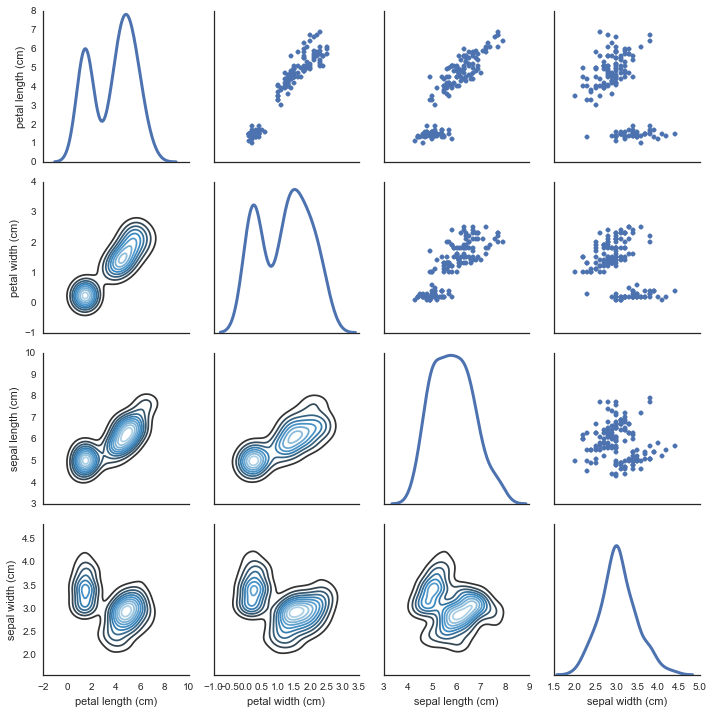

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [124]:
from sklearn.cross_validation import train_test_split

In [125]:
y_cols = ['petal length (cm)']
x_cols = [x for x in dfd.columns if x not in y_cols]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(dfd[x_cols].values, dfd[y_cols].values, test_size=0.1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(135, 6) (135, 1) (15, 6) (15, 1)


### regresssion

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

m = X_train.shape[1]
n = y_train.shape[1]

dims = [256, 256, 256]
dropout = 0.5

model = Sequential()
model.add(Dense(input_dim=m, output_dim=dims[0], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[0], output_dim=dims[1], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[1], output_dim=dims[2], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[2], output_dim=n, init='glorot_uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.0025, decay=1e-6, momentum=0.5, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

Using Theano backend.


ImportError: cannot import name 'Tensor'

In [161]:
out = model.fit(X_train, y_train, nb_epoch=100, batch_size=30, validation_data=(X_test, y_test), show_accuracy=True)

Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 0s - loss: 7.6800 - acc: 1.0000 - val_loss: 3.9948 - val_acc: 1.0000
Epoch 2/100
135/135 [==============================] - 0s - loss: 4.1430 - acc: 1.0000 - val_loss: 3.0299 - val_acc: 1.0000
Epoch 3/100
135/135 [==============================] - 0s - loss: 3.0957 - acc: 1.0000 - val_loss: 4.3709 - val_acc: 1.0000
Epoch 4/100
135/135 [==============================] - 0s - loss: 3.2769 - acc: 1.0000 - val_loss: 2.6329 - val_acc: 1.0000
Epoch 5/100
135/135 [==============================] - 0s - loss: 2.4356 - acc: 1.0000 - val_loss: 0.9373 - val_acc: 1.0000
Epoch 6/100
135/135 [==============================] - 0s - loss: 2.3700 - acc: 1.0000 - val_loss: 2.1099 - val_acc: 1.0000
Epoch 7/100
135/135 [==============================] - 0s - loss: 2.3204 - acc: 1.0000 - val_loss: 1.0991 - val_acc: 1.0000
Epoch 8/100
135/135 [==============================] - 0s - loss: 1.8103 - acc: 1.0000 

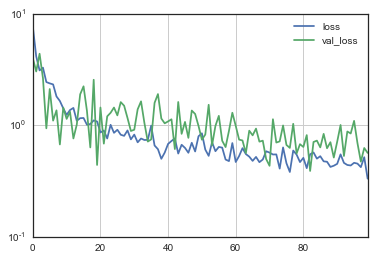

In [162]:
h = pandas.DataFrame(out.history)
h[['loss', 'val_loss']].plot(logy=True)
grid()

In [170]:
mse = lambda x: np.mean(x ** 2)
yp = model.predict(X_train)
ypt = model.predict(X_test)

res = dict(base=mse(y_train - np.mean(y_train)), train=mse(y_train - yp), test=mse(y_test - ypt))
res

{'base': 3.0663451303155007,
 'test': 0.56475749817578902,
 'train': 0.5568739467476026}

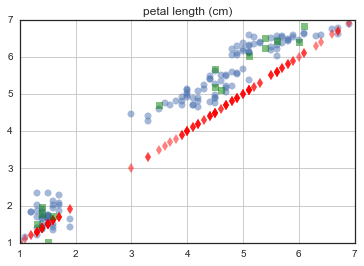

In [163]:
def do_pred_plot(X, y, Xt, yt):
    yp = model.predict(X)
    ypt = model.predict(Xt)
    %matplotlib inline
    for i in range(yp.shape[1]):
        figure()
        clf()
        plot(y[:,i], yp[:,i], 'o', alpha=0.5)
        plot(y[:,i], y[:,i], 'rd', alpha=0.5)
        plot(yt[:,i], ypt[:,i], 'gs', alpha=0.5)
        title(dfd.columns[i])
        grid()
        
do_pred_plot(X_train, y_train, X_test, y_test)

In [164]:
# model.save_weights('iris_weights.h5', overwrite=True)
# w = model.get_weights()

### classification

In [173]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

m = X_train.shape[1]
n = y_train.shape[1]

dims = [10, 10, 10]
dropout = 0.5

model = Sequential()
model.add(Dense(input_dim=m, output_dim=dims[0], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[0], output_dim=dims[1], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[1], output_dim=dims[2], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[2], output_dim=n, init='glorot_uniform'))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.025, decay=1e-6, momentum=0.5, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd)

In [180]:
y = dfd[y_cols].values
y = (y - np.mean(y)) < 0
X_train, X_test, y_train, y_test = train_test_split(dfd[x_cols].values, y, test_size=0.3)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(105, 6) (105, 1) (45, 6) (45, 1)


In [181]:
out = model.fit(X_train, y_train, nb_epoch=100, batch_size=30, validation_data=(X_test, y_test), show_accuracy=True)

Train on 105 samples, validate on 45 samples
Epoch 1/100
105/105 [==============================] - 0s - loss: 0.2970 - acc: 1.0000 - val_loss: 0.1090 - val_acc: 1.0000
Epoch 2/100
105/105 [==============================] - 0s - loss: 0.2382 - acc: 1.0000 - val_loss: 0.1095 - val_acc: 1.0000
Epoch 3/100
105/105 [==============================] - 0s - loss: 0.3265 - acc: 1.0000 - val_loss: 0.1189 - val_acc: 1.0000
Epoch 4/100
105/105 [==============================] - 0s - loss: 0.3185 - acc: 1.0000 - val_loss: 0.1087 - val_acc: 1.0000
Epoch 5/100
105/105 [==============================] - 0s - loss: 0.2966 - acc: 1.0000 - val_loss: 0.1080 - val_acc: 1.0000
Epoch 6/100
105/105 [==============================] - 0s - loss: 0.3202 - acc: 1.0000 - val_loss: 0.1093 - val_acc: 1.0000
Epoch 7/100
105/105 [==============================] - 0s - loss: 0.2756 - acc: 1.0000 - val_loss: 0.1089 - val_acc: 1.0000
Epoch 8/100
105/105 [==============================] - 0s - loss: 0.2942 - acc: 1.0000 

In [182]:
yp = model.predict_proba(X_train)
ypt = model.predict_proba(X_test)

45/45 [==============================] - 0s


0.999222999223
0.979423868313


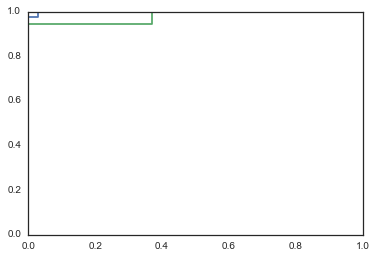

In [183]:
import sklearn.metrics as metrics
fpr, tpr, _ = metrics.roc_curve(y_train, yp)
auc = metrics.auc(fpr, tpr)
plot(fpr, tpr, '-')
print(auc)
fpr, tpr, _ = metrics.roc_curve(y_test, ypt)
auc = metrics.auc(fpr, tpr)
plot(fpr, tpr, '-')
print(auc)

In [215]:
# predict classes not working
metrics.confusion_matrix((y_test), 1 - model.predict_classes(X_test))

45/45 [==============================] - 0s


array([[ 0, 27],
       [ 0, 18]])

In [216]:
metrics.confusion_matrix((y_test).astype(int), (model.predict_proba(X_test) > 0.5).astype(int))

45/45 [==============================] - 0s


array([[27,  0],
       [ 1, 17]])

### scratch

In [96]:
import sklearn.linear_model as lm
e = lm.RidgeClassifier()
e.fit(X_train, y_train)
e.decision_function(X_train)

/Users/davidcottrell/dev/scikit-learn.git/sklearn/linear_model/ridge.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.83197635, -0.63738783,  1.02048646, -0.67142464, -0.82304537,
       -0.73934729,  0.94672925, -0.77016529, -0.33767081,  0.99494268,
       -1.13354766,  1.06303786,  0.8286124 ,  1.07864076, -0.45683198,
        0.90096488, -0.96242715,  0.84989888, -0.56464755, -0.5882595 ,
       -0.63540122, -1.05500022, -1.19348866, -0.50879133, -0.90582271,
       -0.75828675, -0.77906768, -0.86416465, -0.63114392, -0.80988568,
       -1.03332594, -0.92514997, -0.91951533, -0.79464319, -0.7304449 ,
       -1.33570145, -0.78421832,  0.94440963, -0.61128373, -0.3617883 ,
       -0.63540122, -0.60702643, -0.71094511, -0.86131208, -1.35662751,
       -0.51007248, -0.9033795 ,  0.90805319,  1.07101952, -0.89361115,
       -0.88915393, -1.07396707,  1.07101952, -1.23284864, -1.15802556,
       -0.79219998, -0.42509325, -1.27060981,  1.09992724, -1.16973157,
        1.00914085,  1.03945331, -1.24917236,  1.00771457, -0.67122472,
        0.93253109, -1.04133499, -0.92851392,  0.97650877,  1.12